### Read in and analyze data from Wenhan and Harvey's optimization codes
Note: this program assumes that the data will be in a the same directory as the "Data" directory which holds all of the data from these runs.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime
import pytz
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.dpi']=200
plt.rcParams['font.family'] = 'Serif'

In [41]:
def savePNG(pngname): 
    plt.savefig(pngname+".png", bbox_inches="tight", facecolor='w')
symbols = ['o','X','s','v','p','P','*','h','<','3','d','x','+']

In [42]:
def load_data(filename):
    with open(filename) as datafile:
        content = datafile.readlines()
        data = np.array([np.fromstring(c, sep=' ') for c in content])
    return data

In [117]:
# Load all files starting with "mon" in the data_dir

import os
data_dir = "Data/"
# data_dir = "Data/Second Run/"
datafiles = [s for s in os.listdir(data_dir) if s[:3] == "mon" ]
print(len(datafiles))

dataset = {}
for i in range(len(datafiles)):
    datafile = datafiles[i]
    dataset[i] = load_data(data_dir+datafile)

23


In [118]:
dataset[1].shape

(1621, 12)

In [119]:
labels = ['loop time [s]','wall time [s]',r'beam current [$\mu$A]','drain current [mA]','bias current[mA]',
          r'P$_\mathrm{inj}$ [torr]',r'P$_\mathrm{ext}$ [torr]',
          r'I$_\mathrm{inj}$ [A]',r'I$_\mathrm{ext}$ [A]',r'I$_\mathrm{mid}$ [A]',r'I$_\mathrm{sext}$ [A]',
          'xray Src']

P$_\mathrm{ext}$ [torr]


Text(0, 0.5, 'xray Src')

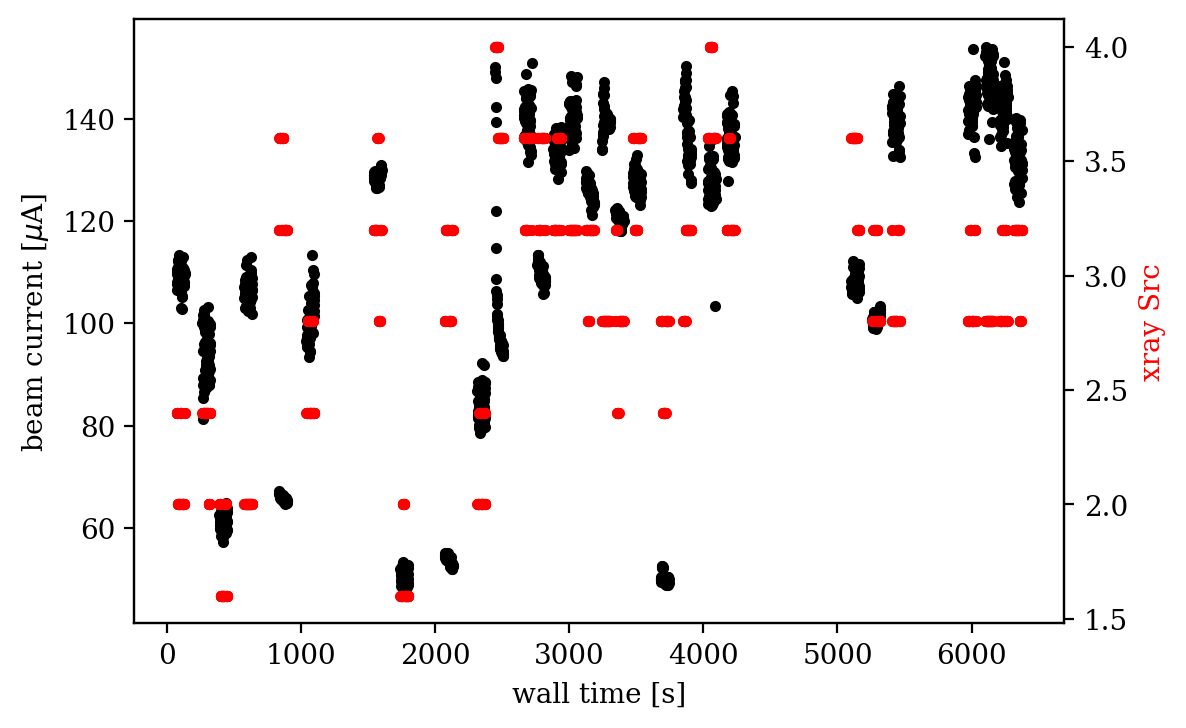

In [120]:
# plot time history

# 0: tloop 1: t wall, 2:Ifc, 3: drain I, 4: bias I, 5:Pinj, 6:Pext, 7:Iinj, 8:Iext, 9:Imid, 10:Isext, 11:xrayS
setnum = 4
data = dataset[setnum]

xindex = 1
yindex1 = 2
yindex2 = 11

fig, ax1 = plt.subplots()
if yindex2>=0: two = 1
if two == 1: ax2 = ax1.twinx()

ax1.plot(data[:,xindex],data[:,yindex1],'k.')
if two==1:
    ax2.plot(data[:,xindex],data[:,yindex2],'r.')

ax1.set_xlabel(labels[xindex])
ax1.set_ylabel(labels[yindex1])
print((labels[6]))
ax2.set_ylabel(labels[yindex2],color='r')
#ax1.set_ylim([0,160])
#if 0: savePNG('07_InjectionPressureVsRunNum')

In [121]:
inewset=np.where(np.diff(data[:,0])<0)[0]

In [122]:
beam_ave=[]
beam_std=[]

yindex = 2
for i in range(len(inewset)):
    iend=inewset[i]+1
    if i==0: istart=0
    beam_ave.append(np.mean(data[istart:iend,yindex]))
    beam_std.append(np.std(data[istart:iend,yindex]))
    istart=iend

<ErrorbarContainer object of 3 artists>

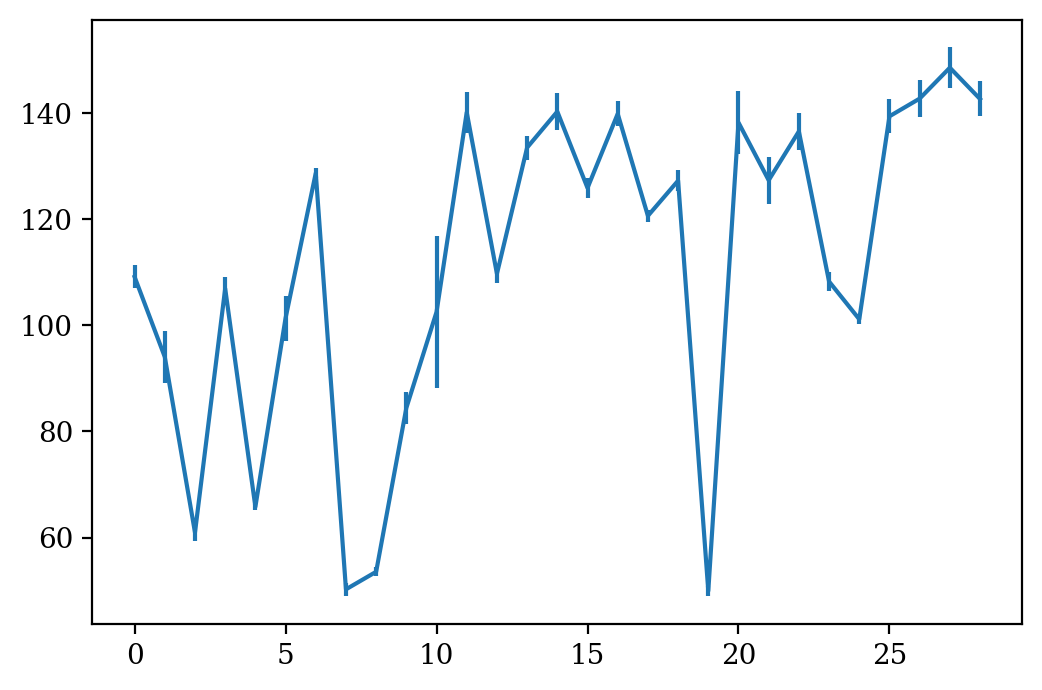

In [123]:
plt.errorbar(np.arange(len(inewset)),beam_ave,yerr=beam_std)

In [124]:
# 0: tloop 1: t wall, 2:Ifc, 3: drain I, 4: bias I, 5:Pinj, 6:Pext, 7:Iinj, 8:Iext, 9:Imid, 10:Isext, 11:xrayS
# inj: 117,127, ext: 100,110, mid: 97,107
runs = []
for i in range(len(dataset)):
    runs.append(datafiles[i])

def gen_plot(setnum, show=False):
    data = dataset[setnum]*1
    try:
        inewset=np.where(np.diff(data[:,0])<0)[0]
    except:
        return

    xpts=[]
    ypts=[]
    zpts=[]
    sizepts=[]
    magpts=[]

    xi = 9
    yi = 8
    zi = 7
    szi = -1
    mgi = 2
    for i in range(len(inewset)):
        iend=inewset[i]+1
        if i==0: istart=0
        xpts.append(np.mean(data[istart:iend,xi]))
        ypts.append(np.mean(data[istart:iend,yi]))
        zpts.append(np.mean(data[istart:iend,zi]))
        sizepts.append(i)
        magpts.append(np.mean(data[istart:iend,mgi]))
        istart=iend
    
    # plotting
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # seperate the best from the rest
    bi = np.argmax(magpts) # best i
    xr, yr, zr, sr, mr = xpts[:],  ypts[:],  zpts[:], sizepts[:], magpts[:]
    xb, yb, zb, sb, mb = xr.pop(bi),  yr.pop(bi),  zr.pop(bi), sr.pop(bi), mr.pop(bi)
    
    if show:
        print(mb)
    
    graph = ax.scatter(xr, yr, zr,s=(np.array(sr)/1.5)**1.5,
               c=mr, vmin=20,vmax=155, linewidths=1, alpha=.7)
    ax.scatter(xb, yb, zb, s=(sb/1.5)**1.5, 
               c=mb, vmin=20,vmax=155, edgecolor='red', linewidths=1, alpha=.7)

    cbar = fig.colorbar(graph)
    cbar.set_label(r'O$^{7+}$ current [$\mu$A]')
    ax.set_xlabel('middle coil current [A]')
    ax.set_ylabel('extraction coil current [A]')
    ax.set_zlabel('other coil current [A]')

    ax.set_xlim([97,110])
    ax.set_ylim([97,110])
    ax.set_zlim([116,128])

    plt.title(runs[setnum-1])
    savePNG('C'+str(setnum))
    if show:
        plt.show()

In [125]:
# gen_plot(16, show=True)

In [126]:
# for i in range(1,len(dataset)+1):
#     gen_plot(i)

In [127]:
xpts=[]
ypts=[]
zpts=[]
sizepts=[]
magpts=[]

xi = 9
yi = 8
zi = 7
szi = -1
mgi = 2

for setnum in range(len(dataset)):
    data = dataset[setnum]*1
    try:
        inewset=np.where(np.diff(data[:,0])<0)[0]
    except:
        continue

    for i in range(len(inewset)):
        iend=inewset[i]+1
        if i==0: istart=0
        xpts.append(np.mean(data[istart:iend,xi]))
        ypts.append(np.mean(data[istart:iend,yi]))
        zpts.append(np.mean(data[istart:iend,zi]))
        sizepts.append(i)
        magpts.append(np.mean(data[istart:iend,mgi]))
        istart=iend

## Data Saving

In [128]:
# save all data
data_list = [xpts, ypts, zpts, sizepts, magpts]
open_file = open("Data/data.pkl", "wb")
pickle.dump(data_list, open_file)
open_file.close()

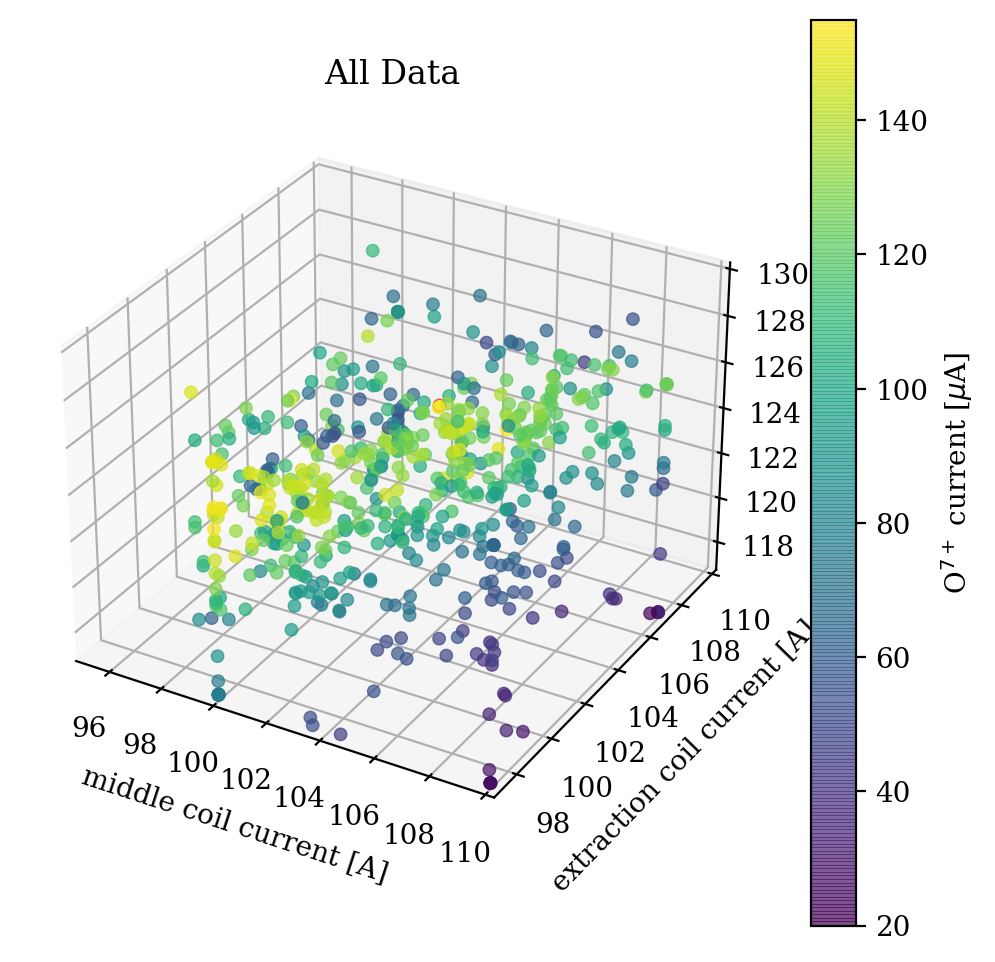

In [129]:
# plotting
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# seperate the best from the rest
bi = np.argmax(magpts) # best i
xr, yr, zr, sr, mr = xpts[:],  ypts[:],  zpts[:], sizepts[:], magpts[:]
xb, yb, zb, sb, mb = xr.pop(bi),  yr.pop(bi),  zr.pop(bi), sr.pop(bi), mr.pop(bi)

graph = ax.scatter(xr, yr, zr,
           c=mr, vmin=20,vmax=155, linewidths=0.5, alpha=.7)
ax.scatter(xb, yb, zb, 
           c=mb, vmin=20,vmax=155, edgecolor='red', linewidths=0.5, alpha=.7)

cbar = fig.colorbar(graph)
cbar.set_label(r'O$^{7+}$ current [$\mu$A]')
ax.set_xlabel('middle coil current [A]')
ax.set_ylabel('extraction coil current [A]')
ax.set_zlabel('other coil current [A]')

ax.set_xlim([95,110])
ax.set_ylim([97,110])
ax.set_zlim([117,130])

plt.title("All Data")
savePNG('All Data')
plt.show()

# Model Loading Example

In [130]:
gpr_model = pickle.load(open("Models/gprMatern0.66.dump","rb"))
normalizer = lambda X: (X - [103.16726412, 103.05644853, 122.86389106] )/ [3.54492885, 3.87407133, 3.28592364]
func = lambda x,y,z: gpr_model.predict(normalizer(np.array([[x,y,z]])))[0]

In [131]:
func(110,110,120)

82.89787777510256